In [38]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data inspection phase 

### Telco Customer Churn Dataset Overview

The Telco Customer Churn dataset contains 7,043 records and 21 features, capturing customer details for a telecommunications company. Key features include `tenure`, `MonthlyCharges`, `TotalCharges`, `Contract`, `InternetService`, `PaymentMethod`, and the binary target variable `Churn` (1 for Yes, 0 for No). Preprocessing steps included removing the `customerID` column, converting `TotalCharges` to numeric, merging "No phone service" and "No internet service" into "No" for relevant columns, and creating dummy variables for categorical features with `drop_first=False`. The dataset was scaled using MinMaxScaler and split into 75% training and 25% testing sets for machine learning model development.

In [39]:
# Loading the dataset
customer_df = pd.read_csv('Telco-Customer-Churn.csv')

customer_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [41]:
# Dataframe columns
customer_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Displaying the data types of each column
customer_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data preprocessing phase

### Data Preprocessing Overview

The Telco Customer Churn dataset was preprocessed using the following functions to prepare it for modeling:

- `convert_to_numeric`: Converts `TotalCharges` to numeric, coercing errors to NaN for consistent data types.
- `remove_missing_rows`: Drops rows with missing values to ensure data completeness.
- `check_and_drop_duplicates`: Removes duplicate rows to avoid redundant data.
- `drop_column`: Eliminates `customerID` as it’s irrelevant for analysis.
- `convert_column_to_binary`: Transforms `Churn` into binary (1 for Yes, 0 for No) for classification.
- `preprocess_service_columns`: Merges "No phone service" and "No internet service" into "No" for columns like `MultipleLines` and `OnlineSecurity` to simplify categories.
- `convert_categorical_to_dummies`: Converts categorical variables to dummy variables (`drop_first=True`) to enable numerical modeling while avoiding the dummy variable trap by dropping the first category.

In [7]:
def convert_to_numeric(df, column_name):
    """
    Convert a specified column in a DataFrame to numeric,
    handling errors by coercing to NaN.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame
    column_name (str): The name of the column to convert
    
    Returns:
    pandas.DataFrame: The DataFrame with the converted column
    """
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

In [42]:
def remove_missing_rows(df):
    """
    Check for and remove rows with missing values from a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame
    
    Returns:
    pandas.DataFrame: The DataFrame with rows containing missing values removed
    """

    missing_info = df.isnull().sum()
    print("Missing values per column:\n", missing_info)
    
    df = df.dropna()
    
    return df

In [43]:
def check_and_drop_duplicates(df):
    """
    Check for duplicates in a DataFrame, display them,
    drop duplicates, and return the cleaned DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame to check for duplicates.
    
    Returns:
    pandas.DataFrame: The DataFrame with duplicates removed.
    """
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}")

    if duplicate_rows > 0:
        print("Duplicate rows:")
        print(df[df.duplicated()])

    df = df.drop_duplicates()
    print(f"New number of rows after dropping duplicates: {df.shape[0]}")
    return df

In [44]:
def drop_column(df, column_name):
    """
    Remove a specified column from a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame
    column_name (str): The name of the column to remove
    
    Returns:
    pandas.DataFrame: The DataFrame with the specified column dropped
    """
    df = df.drop(column_name, axis=1)
    print(f"Dropped column: {column_name}")
    return df

In [45]:
def convert_column_to_binary(df, column_name):
    """
    Convert a specified column to binary numeric values using np.where.
    Replaces 'Yes' with 1 and 'No' with 0 in the same column.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame
    column_name (str): The name of the column to convert
    
    Returns:
    pandas.DataFrame: The DataFrame with the converted binary column
    """
    df[column_name] = np.where(df[column_name] == 'Yes', 1, 0)
    print(f"Converted {column_name} to binary: 1 for 'Yes', 0 for 'No'")
    return df

In [50]:
def preprocess_service_columns(df, column_name, no_service_value='No internet service'):
    """Merge 'No internet service' or 'No phone service' into 'No' for specified column."""
    df[column_name] = df[column_name].replace(no_service_value, 'No')
    print(f"Preprocessed {column_name}: '{no_service_value}' merged into 'No'")
    return df

In [ ]:
def convert_categorical_to_dummies(df, drop_first=True):
    """Convert categorical columns to dummy variables."""
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if not categorical_cols:
        print("No categorical columns found.")
        return df.copy()
    df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first, dtype=int)
    print(f"Converted to dummies: {categorical_cols}")
    print(f"New shape: {df_dummies.shape}")
    return df_dummies

In [46]:
# Convert TotalCharges to numeric using the function
customer_df = convert_to_numeric(customer_df, 'TotalCharges')
print(customer_df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [10]:
# Remove rows with missing values
customer_df = remove_missing_rows(customer_df)
print(f"New shape of DataFrame: {customer_df.shape}")

Missing values per column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
New shape of DataFrame: (7032, 21)


In [47]:
# Check and drop duplicates
customer_df = check_and_drop_duplicates(customer_df)

Number of duplicate rows: 0
New number of rows after dropping duplicates: 7043


In [48]:
# Remove customerID column using the function
customer_df = drop_column(customer_df, 'customerID')
print("Updated columns:\n", customer_df.columns)

Dropped column: customerID
Updated columns:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [49]:

# Convert Churn to binary numeric values
customer_df = convert_column_to_binary(customer_df, 'Churn')

# Check the result
customer_df['Churn'].head()

Converted Churn to binary: 1 for 'Yes', 0 for 'No'


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [51]:
# Preprocess columns with 'No internet service' or 'No phone service'
service_columns = {
    'MultipleLines': 'No phone service',
    'OnlineSecurity': 'No internet service',
    'OnlineBackup': 'No internet service',
    'DeviceProtection': 'No internet service',
    'TechSupport': 'No internet service',
    'StreamingTV': 'No internet service',
    'StreamingMovies': 'No internet service'
}
for col, no_service_val in service_columns.items():
    customer_df = preprocess_service_columns(customer_df, col, no_service_val)

Preprocessed MultipleLines: 'No phone service' merged into 'No'
Preprocessed OnlineSecurity: 'No internet service' merged into 'No'
Preprocessed OnlineBackup: 'No internet service' merged into 'No'
Preprocessed DeviceProtection: 'No internet service' merged into 'No'
Preprocessed TechSupport: 'No internet service' merged into 'No'
Preprocessed StreamingTV: 'No internet service' merged into 'No'
Preprocessed StreamingMovies: 'No internet service' merged into 'No'


In [53]:
# Convert categoricals to dummies with drop_first=True to avoid dummy variable trap
telecom_cust_dummies = convert_categorical_to_dummies(customer_df, drop_first=True)

# Check result
pd.set_option('display.max_columns', None)

telecom_cust_dummies.head()

Converted to dummies: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
New shape: (7043, 24)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


# Data visualisation phase

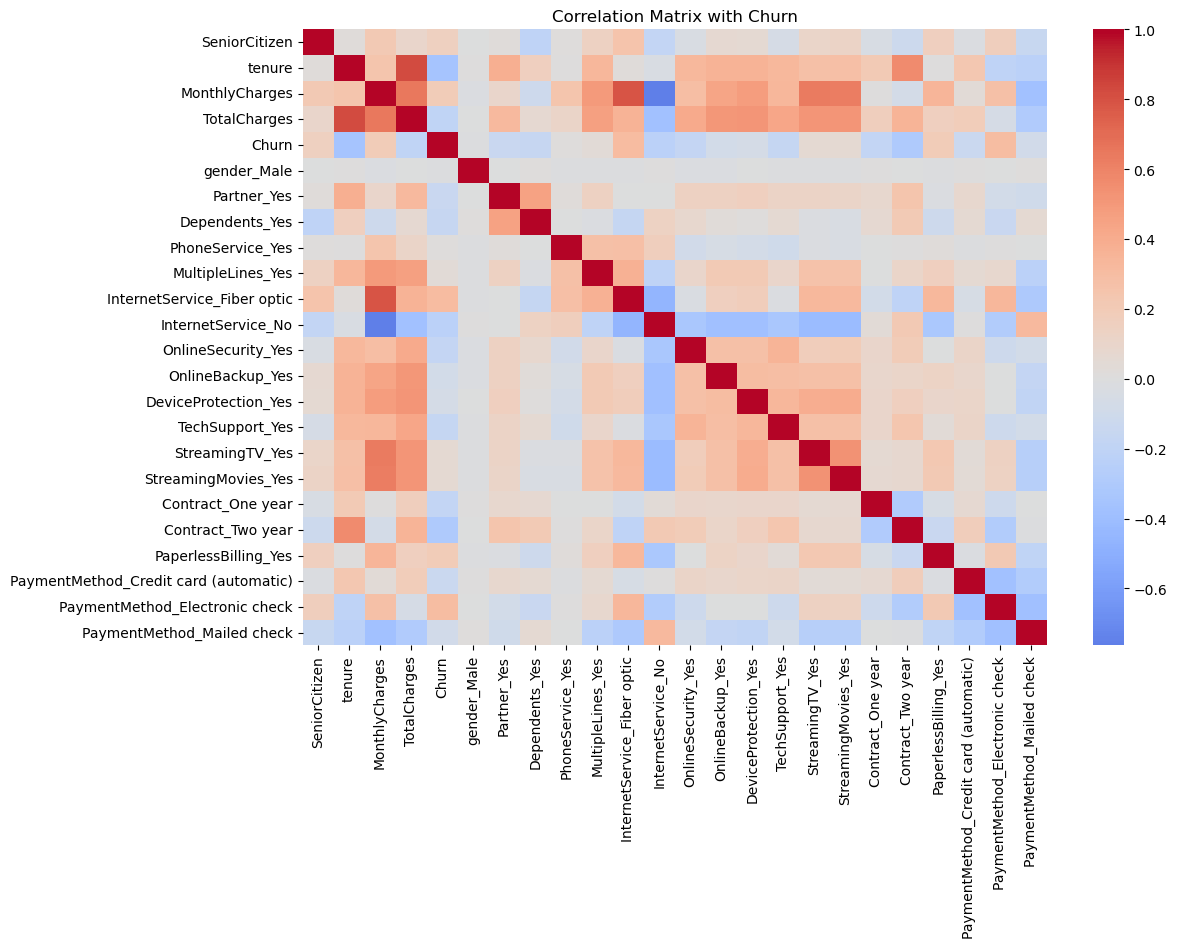

Feature Correlations with Churn (sorted by absolute value):
Churn                                    1.000000
tenure                                  -0.354049
InternetService_Fiber optic              0.307463
Contract_Two year                       -0.301552
PaymentMethod_Electronic check           0.301455
InternetService_No                      -0.227578
TotalCharges                            -0.199484
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
SeniorCitizen                            0.150541
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    

In [21]:
# Calculate correlation matrix
corr_matrix = telecom_cust_dummies.corr()

# Correlation plot for features vs Churn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix with Churn')
plt.show()

# Extract and sort correlations with Churn by absolute value
churn_corr = corr_matrix['Churn'].sort_values(key=abs, ascending=False)

# Print results
print("Feature Correlations with Churn (sorted by absolute value):")
print(churn_corr)

#### Churn Correlation Insights
The correlation heatmap shows `tenure` (-0.354) and `Contract_Two year` (-0.302) strongly reduce churn, while `InternetService_Fiber optic` (0.307) and `PaymentMethod_Electronic check` (0.301) increase it. These highlight tenure, contract type, internet service, and payment method as dominant key churn drivers.

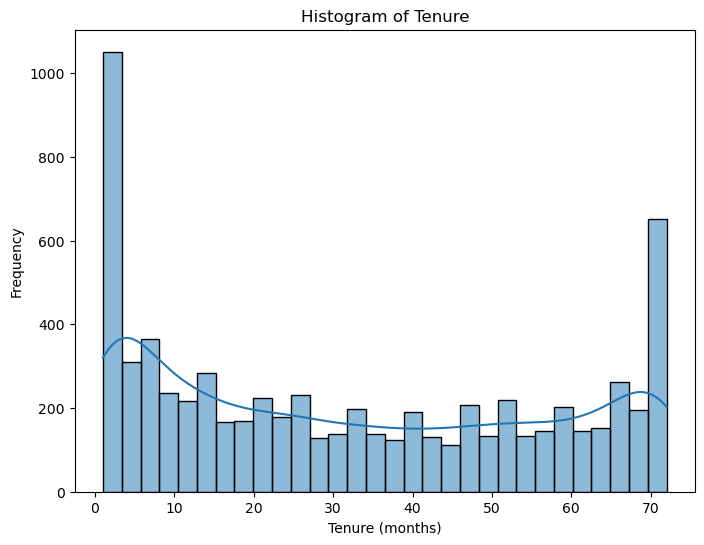

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(customer_df['tenure'], bins=30, kde=True)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()


#### Histogram insight:
The histogram above shows that tenure is not uniformly distributed. Most customers are concentrated at the beginning (0–1 month) and the end (near 72 months) of service, with fewer customers in the mid-range. This suggests high early churn and strong long-term retention.

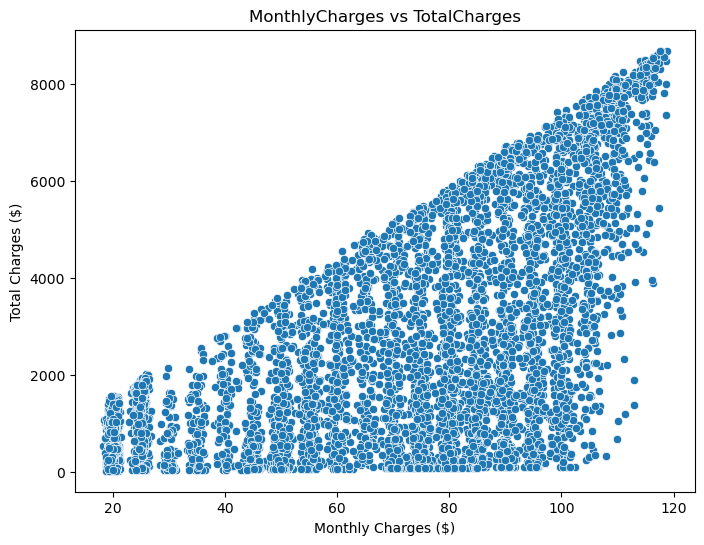

In [23]:
# Scatter plot of MonthlyCharges vs TotalCharges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_df['MonthlyCharges'], y=customer_df['TotalCharges'])
plt.title('MonthlyCharges vs TotalCharges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.show()

#### Insight on the scatter plot:
The scatter plot shows a strong positive linear relationship between MonthlyCharges and TotalCharges, with higher monthly charges leading to higher accumulated total charges over time. This may suggest that customers with higher monthly costs but lower total charges (shorter tenure) could be more prone to churn.  



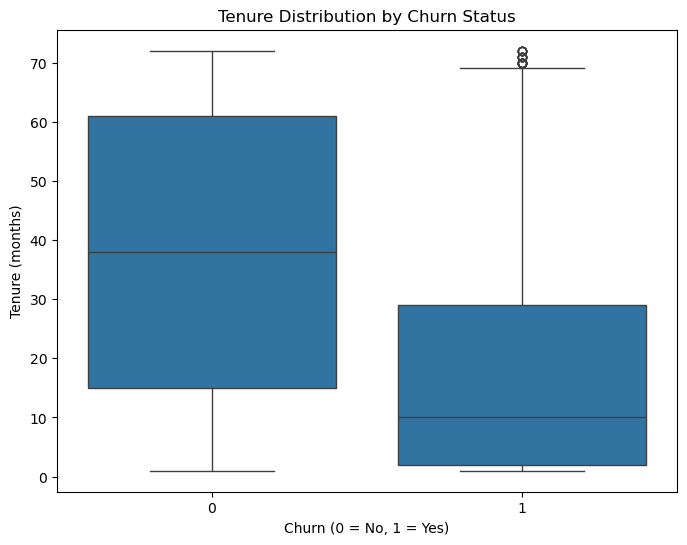

In [24]:
# Box plot of tenure for churned vs non-churned
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=customer_df)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (months)')
plt.show()

#### Boxplot insight on tenure
The boxplot shows that customers who did not churn generally have a much longer tenure (median ≈ 38 months) compared to those who churned (median ≈ 10 months). This indicates that churn is more common among newer/short-tenure customers.


# ML Training Phase

### Logistic Regression Model

In [26]:
# Scale all variables to range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(telecom_cust_dummies.drop('Churn', axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=telecom_cust_dummies.drop('Churn', axis=1).columns)

# Split dataset into training and test sets (test size = 25%)
X = X_scaled_df
y = telecom_cust_dummies['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# Train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.7912400455062572


### Random Forest Model

In [54]:
# Viewing hyperparameters of the RandomForestClassifier
clf = RandomForestClassifier()
clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# Create and train Random Forest Classifier with specified hyperparameters
rf = RandomForestClassifier(
    n_estimators=2000,
    oob_score=True,
    max_features='sqrt',
    max_leaf_nodes=50,
    bootstrap=True,
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Print OOB score
print("Random Forest OOB Score:", rf.oob_score_)

Random Forest OOB Score: 0.8054607508532423


In [33]:
# Make predictions on test data
y_pred_rf = rf.predict(X_test)

# Calculate and print accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Calculate and print OOB error estimation
oob_error = 1 - rf.oob_score_
print("Random Forest OOB Error:", oob_error)

Random Forest Accuracy: 0.7952218430034129
Random Forest OOB Error: 0.1945392491467577


#### Random Forest Generalization
The Random Forest model achieves an accuracy of 0.795 on the test set and an OOB error of 0.195. The close alignment between the test accuracy and OOB score (0.805) suggests the model generalizes well to unseen data, with low overfitting and robust predictive performance.

Logistic Regression Confusion Matrix:
[[1154  146]
 [ 221  237]]


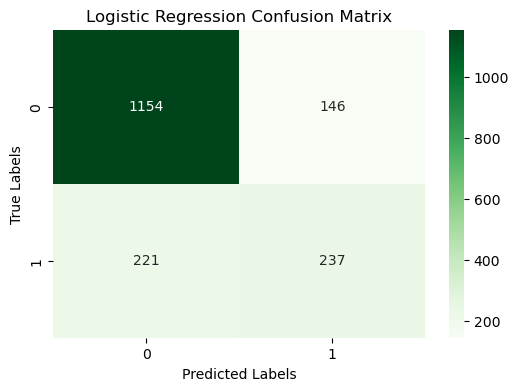


Random Forest Confusion Matrix:
[[1192  108]
 [ 252  206]]


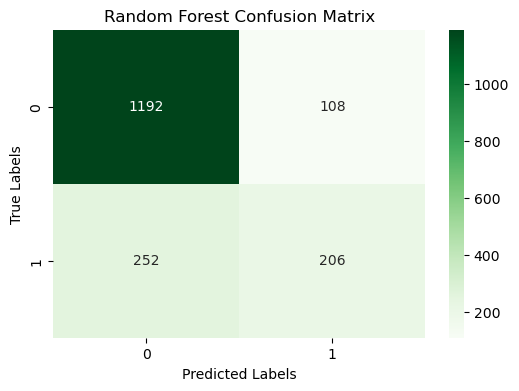

In [37]:
# Calculate and plot confusion matrix for both models
# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [36]:
# Compute precision and recall for both models
# Logistic Regression
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
print("\nLogistic Regression Precision:", precision_logreg)
print("Logistic Regression Recall:", recall_logreg)

# Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("\nRandom Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)


Logistic Regression Precision: 0.618798955613577
Logistic Regression Recall: 0.517467248908297

Random Forest Precision: 0.6560509554140127
Random Forest Recall: 0.4497816593886463


### Model Performance Analysis

##### Confusion Matrix Insights
- **Logistic Regression**: Predicts 1154 true negatives (non-churn) and 237 true positives (churn), but has 146 false positives and 221 false negatives. It correctly identifies most non-churners but misses many churners.
- **Random Forest**: Predicts 1192 true negatives and 206 true positives, with 108 false positives and 252 false negatives. It’s stronger at identifying non-churners but struggles more with churners compared to logistic regression.

##### Precision and Recall Analysis
- **Logistic Regression**: Precision (0.619) indicates 61.9% of predicted churners are correct; recall (0.517) shows it catches 51.7% of actual churners. It balances precision and recall but misses nearly half of churners.
- **Random Forest**: Precision (0.656) is higher, meaning 65.6% of predicted churners are correct; recall (0.450) is lower, catching only 45.0% of churners. It prioritizes precision over recall, reducing false positives but missing more churners.

##### Trade-off
Random Forest has better precision, making fewer incorrect churn predictions, but its lower recall means it misses more actual churners compared to logistic regression. Logistic regression offers a better balance for identifying churners, critical for targeting retention efforts.

### Model Comparison: Logistic Regression vs. Random Forest

##### Metric Comparison
- **Accuracy**: Logistic Regression (0.792) slightly outperforms Random Forest (0.795), indicating similar overall correctness.
- **Precision**: Random Forest (0.656) is higher than Logistic Regression (0.619), making fewer false positive churn predictions.
- **Recall**: Logistic Regression (0.517) surpasses Random Forest (0.450), identifying more actual churners.
- **OOB Error (Random Forest only)**: 0.195 suggests good generalization, aligning closely with its test accuracy.

##### Suitability for Churn Prediction
Logistic Regression is more suitable for this task. Its higher recall ensures better identification of churners, crucial for targeting retention efforts in a telecom context where missing churners is costlier than false positives. Random Forest’s higher precision reduces incorrect churn predictions but misses more actual churners, making it less effective for this goal.